In [34]:
import numpy as np
import gym
import random
import math

In [ ]:
env1 =["SHFF", "FFFH", "FHFH", "HFFG"]
env2= ["SFFFFF", "FFFHFF", "FHFHHH", "HFFFFG"]
env3 = ['SFFHFFHH', 'HFFFFFHF', 'HFFHHFHH', 'HFHHHFFF', 'HFHHFHFF', 'FFFFFFFH', 'FHHFHFHH', 'FHHFHFFG'] 

selectedEnv = env2
env = gym.make('FrozenLake-v1', desc=selectedEnv, render_mode="rgb_array", is_slippery = False)
env.reset()
env.render() # Completing this on HPC with no render mode

/home/or06360/miniconda3/envs/rllib/lib/python3.8/site-packages/gym/envs/registration.py:623: UserWarning: WARN: The environment is being initialised with mode (None) that is not in the possible render_modes (['human', 'ansi', 'rgb_array']).
  logger.warn(


(0, {'prob': 1})

In [36]:
env.action_space
from gym import Env

In [37]:
print(f'The observation space:  {env.observation_space}')
print(f'The action space:       {env.action_space}')

The observation space:  Discrete(24)
The action space:       Discrete(4)


In [38]:
# change-able parameters:
discount_factor = 0.99
delta_threshold = 0.00001
epsilon = 1

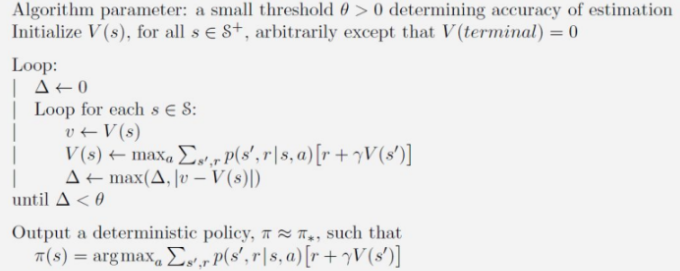

In [47]:
'''
env.P[s][a] is a list of transition tuples (prob, next_state, reward, done)
'''
def value_iteration(env :Env, gamma=0.9, epsilon=1e-6):
    num_states = env.observation_space.n
    num_actions = env.action_space.n
    curr_episode = 0
    

    # Initialize the value function
    V = np.zeros(num_states)
    #Write your code to implement value iteration main loop
    # delta = 0        
    

    while True:
        delta = 0
        for state in range(env.observation_space.n):
            q = [] #Action-value

            v = V[state]
            for action in range(env.action_space.n):
                for probability,next_state,reward, done in env.P[state][action]:
                    q.append(probability*(reward+gamma*V[next_state]))
            V[state] = np.max(np.array(q))
            delta = max(delta,np.abs(v - V[state]))
        if delta <= epsilon:
            break
                 
    # Write your code here to extract the optimal policy from value function. 
    # For each state, the policy will tell you the action to take
    policy = np.zeros(num_states, dtype=int)
    
    # policy = np.zeros((env.observation_space.n, env.action_space.n),dtype=int)
    for state in range(env.observation_space.n):
        # q_values = np.zeros(num_states)
        act = []
        v = V[state]
        for action in range(env.action_space.n):
            probability,next_state,reward, done = env.P[state][action][0]
            act.append(probability*(reward+gamma*V[next_state]))

        # print(np.argmax(np.array(act)))
        policy[state] = np.argmax(np.array(act))
    return policy, V


In [48]:
# Run value iteration
policy, V = value_iteration(env)

# Print results
print("Optimal Value Function:")
print(V.reshape(len(selectedEnv), len(selectedEnv[0])))

print("\nOptimal Policy (0=Left, 1=Down, 2=Right, 3=Up):")
# print(policy)
print(policy.reshape(len(selectedEnv), len(selectedEnv[0])))

Optimal Value Function:
[[0.4782969  0.531441   0.59049    0.531441   0.4782969  0.43046721]
 [0.531441   0.59049    0.6561     0.         0.43046721 0.38742049]
 [0.4782969  0.         0.729      0.         0.         0.        ]
 [0.         0.729      0.81       0.9        1.         0.        ]]

Optimal Policy (0=Left, 1=Down, 2=Right, 3=Up):
[[1 1 1 0 0 0]
 [2 2 1 0 3 0]
 [3 0 1 0 0 0]
 [0 2 2 2 2 0]]


In [49]:
# resetting the environment and executing the policy
state = env.reset()
state = state[0]
step = 0
done = False
print(state)

max_steps = 100
for step in range(max_steps):

    # Getting max value against that state, so that we choose that action
    action =policy[state]
    new_state, reward, done, truncated, info = env.step(action) #information after taking the action

    env.render()
    if done:
        print("number of steps taken:", step)
        break

    state = new_state

env.close()

0
number of steps taken: 7
